In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('train_dataset.csv')
dataset_train.head()


,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%Return
0,0,16-11-2005,128.30,128.3,131.40,128.30,130.75,130.55,130.21,7674878,9.993235e+08,100967,3723434,48.51,1.753702
1,0,17-11-2005,130.55,130.8,131.45,129.15,130.30,130.20,129.97,5615090,7.298068e+08,100967,2703422,48.15,-0.268097
2,0,18-11-2005,130.20,130.6,131.50,130.05,130.50,130.80,130.91,4292668,5.619565e+08,100967,1851014,43.12,0.460829
3,0,21-11-2005,130.80,131.0,131.00,126.15,126.50,126.75,128.20,9279903,1.189681e+09,100967,5758233,62.05,-3.096330
4,0,22-11-2005,126.75,128.4,129.80,124.75,125.05,125.10,125.92,8280229,1.042652e+09,100967,3199799,38.64,-1.301775


In [4]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 8: 9].values
training_set

array([[130.21],
       [129.97],
       [130.91],
       ...,
       [277.5 ],
       [274.82],
       [273.98]])

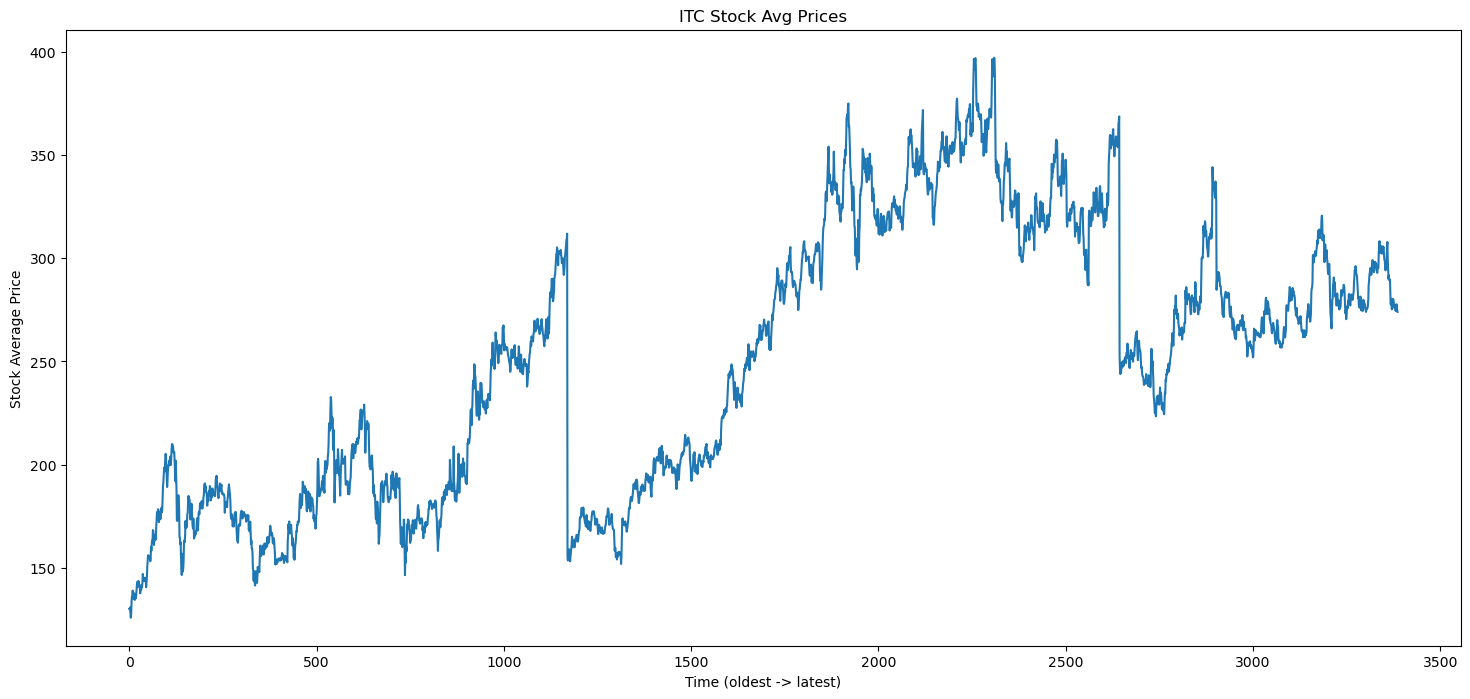

In [6]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Average Price'])
plt.title("ITC Stock Avg Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Average Price")
plt.show()

In [7]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# 150 timesps and 1 outputte
X_train = []
y_train = []
for i in range(150, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-150: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [11]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
102/102 [==============================] - 23s 162ms/step - loss: 0.0212
Epoch 2/100
102/102 [==============================] - 17s 165ms/step - loss: 0.0058
Epoch 3/100
102/102 [==============================] - 17s 163ms/step - loss: 0.0055
Epoch 4/100
102/102 [==============================] - 17s 163ms/step - loss: 0.0050
Epoch 5/100
102/102 [==============================] - 16s 161ms/step - loss: 0.0047
Epoch 6/100
102/102 [==============================] - 17s 162ms/step - loss: 0.0045
Epoch 7/100
102/102 [==============================] - 17s 162ms/step - loss: 0.0044
Epoch 8/100
102/102 [==============================] - 17s 163ms/step - loss: 0.0042
Epoch 9/100
102/102 [==============================] - 16s 161ms/step - loss: 0.0035
Epoch 10/100
102/102 [==============================] - 17s 170ms/step - loss: 0.0036
Epoch 11/100
102/102 [==============================] - 17s 171ms/step - loss: 0.0030
Epoch 12/100
102/102 [==============================] - 17s 171

102/102 [==============================] - 19s 189ms/step - loss: 8.9530e-04
Epoch 96/100
102/102 [==============================] - 28s 279ms/step - loss: 0.0010
Epoch 97/100
102/102 [==============================] - 17s 168ms/step - loss: 8.9379e-04
Epoch 98/100
102/102 [==============================] - 20s 194ms/step - loss: 9.8592e-04
Epoch 99/100
102/102 [==============================] - 20s 192ms/step - loss: 9.1987e-04
Epoch 100/100
102/102 [==============================] - 19s 188ms/step - loss: 9.1011e-04


In [14]:
dataset_test = pd.read_csv('test_dataset.csv')
dataset_test.head()

,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%Return
0,0,01-07-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21,0.401680
1,0,02-07-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04,-0.400073
2,0,03-07-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82,1.040716
3,0,04-07-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50,0.343332
4,0,05-07-2019,277.65,277.65,281.85,268.00,280.35,279.45,276.25,37047327,1.023441e+10,218676,20876681,56.35,0.648298


In [30]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 8: 9].values
real_stock_price.shape

(846, 1)

In [22]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Average Price'], dataset_test['Average Price']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [23]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)
len(inputs)

906

In [24]:
X_test = []
for i in range(150, len(inputs)):
    X_test.append(inputs[i-150:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(756, 150, 1)

In [25]:
predicted_stock_price = regressor.predict(X_test)
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

24/24 [==============================] - 1s 59ms/step


In [27]:
predicted_stock_price.size

756

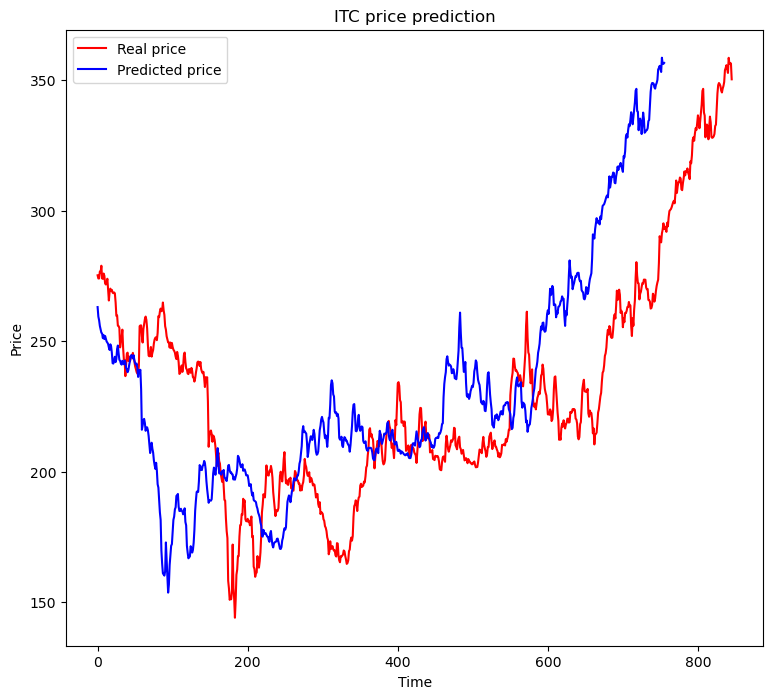

In [33]:
#visualize the prediction and real price
plt.figure(figsize=(9, 8))
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('ITC price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()